In [71]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import regularizers


In [7]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()  #loaded the cifar10 datasets

In [8]:
X_train, X_test = X_train/255.0, X_test/255.0   #normalized the data to be in between 0 and 1

In [11]:
num_classes = 10
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)   #one hot encoding

In [14]:
print(f'X_train.shape{X_train.shape}, y_train.shape{y_train.shape}')
print(f'X_test.shape {X_test.shape}, y_test.shape {y_test.shape}')  #sees the shape of the data

X_train.shape(50000, 32, 32, 3), y_train.shape(50000, 10)
X_test.shape (10000, 32, 32, 3), y_test.shape (10000, 10)


In [15]:
input_shape=(32,32,3)  #input shape to be 32,32 and 3 to be becuase  of rgb classes
inputs = Input(shape=(input_shape))  #defined the input layer

In [84]:
x = Conv2D(32,(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001))(inputs)
x = layers.BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)  #added first convulation layer
x = layers.Dropout(0.3)(x)

In [83]:
x = Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer = regularizers.l2(0.001))(x)  #32 filters, 3x3 kernel size, ReLU activation, 'same' padding.
x = layers.BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)   #second convulational layers  #2x2 max pooling to reduce spatial dimensions.
x = layers.Dropout(0.3)(x)

In [82]:
x = Conv2D(128,(3,3), activation='relu', padding='same', kernel_regularizer= regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
 #third convulational layer

In [28]:
x =Flatten()(x)   #flattened  the input

In [81]:
x = Dense(128, activation='relu', kernel_regularizer = regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
x = Dense(64, activation='relu', kernel_regularizer = regularizers.l2(0.001))(x)   #Dense layers
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

In [30]:
outputs = Dense(num_classes, activation='softmax')(x)   #output layers with 10 classes

In [31]:
model = Model(inputs = inputs, outputs = outputs)   #created a model

In [32]:
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 2, 2, 128)           │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 1, 1, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 0, 0, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 0)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,250 (868.16 KB)

 Trainable params: 222,250 (868.16 KB)

 Non-trainable params: 0 (0.00 B)

None


In [35]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ["accuracy"])  #compiled the model

In [43]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/10


ValueError: Exception encountered when calling MaxPooling2D.call().

[1mNegative dimension size caused by subtracting 2 from 1 for '{{node functional_1_1/max_pooling2d_8_1/MaxPool2d}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](functional_1_1/conv2d_11_1/Relu)' with input shapes: [?,1,1,128].[0m

Arguments received by MaxPooling2D.call():
  • inputs=tf.Tensor(shape=(None, 1, 1, 128), dtype=float32)

X_train.shape: (50000, 32, 32, 3), y_train.shape: (50000, 10)
X_test.shape: (10000, 32, 32, 3), y_test.shape: (10000, 10)


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,150,858 (4.39 MB)

 Trainable params: 1,150,858 (4.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


C:\Users\Anusha\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 33ms/step - accuracy: 0.3782 - loss: 1.6859 - val_accuracy: 0.6336 - val_loss: 1.0449
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.6476 - loss: 0.9993 - val_accuracy: 0.6705 - val_loss: 0.9356
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.7189 - loss: 0.8003 - val_accuracy: 0.7025 - val_loss: 0.8457
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7588 - loss: 0.6776 - val_accuracy: 0.7276 - val_loss: 0.7843
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.8025 - loss: 0.5628 - val_accuracy: 0.7247 - val_loss: 0.8198
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.8377 - loss: 0.4723 - val_accuracy: 0.7347 - val_loss: 0.8362
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.8664 - loss: 0.3876 - val_accuracy: 0.7273 - val_loss: 0.8824
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.8897 - loss: 0.31

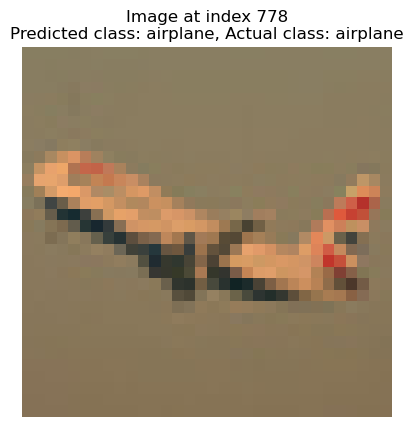

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the data to be in the range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert labels to categorical one-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Print the shapes of the data
print(f"X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}")

# Define input shape
input_shape = (32, 32, 3)
inputs = Input(shape=input_shape)

# First Convolutional Layer
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = MaxPooling2D((2, 2))(x)

# Second Convolutional Layer
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)

# Third Convolutional Layer
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
# No MaxPooling2D here to avoid reducing spatial dimensions too much

# Flatten the input
x = Flatten()(x)

# Dense layers
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# Output layer with softmax activation for 10 classes
outputs = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Create ImageDataGenerator for loading data in batches
datagen = ImageDataGenerator()
train_generator = datagen.flow(X_train, y_train, batch_size=32)
test_generator = datagen.flow(X_test, y_test, batch_size=32)

# Train the model using the generator
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=test_generator)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Select a sample index
sample_idx = 778

# Expand dimensions for single sample input
sample_input = np.expand_dims(X_test[sample_idx], axis=0)

# Make predictions on the single sample
predictions = model.predict(sample_input)

# Get the predicted class index and name
predicted_class_idx = np.argmax(predictions)
predicted_class = class_names[predicted_class_idx]

# Get the actual class index and name
actual_class_idx = np.argmax(y_test[sample_idx])
actual_class = class_names[actual_class_idx]

# Print the predicted and actual class names
print(f'Predicted class: {predicted_class}')
print(f'Actual class: {actual_class}')

# Display the image at the specified index
plt.imshow(X_test[sample_idx])
plt.title(f'Image at index {sample_idx}\nPredicted class: {predicted_class}, Actual class: {actual_class}')
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
#CIFAR 100 CNN

In [86]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.layers import Dense,Flatten,Input,MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers,regularizers

In [28]:
(X_train,y_train), (X_test,y_test) = cifar100.load_data()

In [29]:
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_train/=255.0
X_test/=255.0

In [30]:
num_classes = 100
y_train = to_categorical(y_train, num_classes = num_classes)
y_test  = to_categorical(y_test, num_classes = num_classes)

In [31]:
print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}')

X_train.shape: (50000, 32, 32, 3), y_train.shape: (50000, 100)
X_test.shape: (10000, 32, 32, 3), y_test.shape: (10000, 100)


In [32]:
input_shape = (32,32,3)
inputs = Input(shape=(input_shape))

In [88]:
x = Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer = regularizers.l2(0.001))(inputs)
x = MaxPooling2D((2,2))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
x = Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer = regularizers.l2(0.001))(x)
x = MaxPooling2D((2,2))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
x = Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer = regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

In [34]:
x = Flatten()(x)

In [89]:
x = Dense(128, activation='relu', kernel_regularizer = regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
x = Dense(64, activation='relu', kernel_regularizer = regularizers.l2(0.001))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

In [90]:
outputs = Dense(num_classes, activation='softmax')(x)

In [93]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [94]:
datagen = ImageDataGenerator(rotation_range = 20,
                            width_shift_range = 0.2,
                            height_shift_range = 0.2,
                            horizontal_flip = True
                            )
datagen.fit(X_train)

In [95]:
history = model.fit(datagen.flow(X_train,y_train, batch_size=32), epochs = 20, validation_data=(X_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 35ms/step - accuracy: 0.3977 - loss: 2.2909 - val_accuracy: 0.4191 - val_loss: 2.2553
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.3993 - loss: 2.2684 - val_accuracy: 0.3864 - val_loss: 2.4524
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.4070 - loss: 2.2569 - val_accuracy: 0.3933 - val_loss: 2.3788
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.4084 - loss: 2.2412 - val_accuracy: 0.3885 - val_loss: 2.4465
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.4120 - loss: 2.2320 - val_accuracy: 0.3866 - val_loss: 2.4531
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.4137 - loss: 2.2124 - val_accuracy: 0.4185 - val_loss: 2.2708
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.4106 - loss: 2.2195 - val_accuracy: 0.4097 - val_loss: 2.3407
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.4245 -

In [96]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4438 - loss: 2.2349
Test Loss: 2.219146251678467
Test Accuracy: 0.4406000077724457


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Image at index 5765
 Predicted Class: palm_tree, Actual Class palm_tree


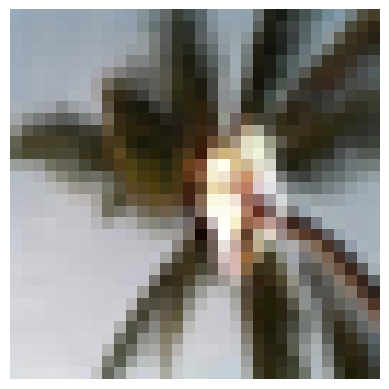

In [98]:
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree',
    'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
    'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank',
    'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip',
    'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]
sam_idx = 5765
sample_input = np.expand_dims(X_test[sam_idx], axis=0)
predictions = model.predict(sample_input)
predicted_class_idx = np.argmax(predictions)
predicted_class = class_names[predicted_class_idx]
actual_class_idx = np.argmax(y_test[sam_idx])
actual_class = class_names[actual_class_idx]
plt.imshow(X_test[sam_idx], cmap='Greys')
plt.title(print(f'Image at index {sam_idx}\n Predicted Class: {predicted_class}, Actual Class {actual_class}'))
plt.axis('off')
plt.show()
